<h1><center>Dependencies and Path</center></h1>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pd.set_option('display.max_columns', None)
df = pd.read_csv("train.csv", low_memory = False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<h1><center>Cleaning</center></h1>

<h7><center>Drop Columns</center></h7>

In [63]:
df = df.drop(['ID', 'Name', 'SSN'], axis = 1)

<h7><center>Encodeing</center></h7>

In [66]:
cat_feat = ['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
for name in cat_feat:
    df[name]=df[name].astype('category')
    df[name]=df[name].cat.codes

<h7><center>Removing Underscores</center></h7>

In [4]:
df = df.replace('_', '', regex = True) 

<h7><center>Change Values</center></h7>

In [5]:
idx = df.loc[df['Monthly_Balance'].astype('float') < -1].index
i_d = df.loc[df['Monthly_Balance'].astype('float') < -1]['Customer_ID'].astype('int').to_list()
for i, val in enumerate(idx):
    df.iloc[val, 23] = df.loc[df['Customer_ID'] == i_d[i]]['Monthly_Balance'].astype('float').drop(val).mean()

<h7><center>Change Dtypes</center></h7>

In [6]:
df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']] = df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']].apply(pd.to_numeric)

<h7><center>Change Values</center></h7>

In [7]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Age'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Age'].index
    for i, val in enumerate(fig):
        if val > 115 or val < 0:
            df.iloc[idx[i], 2] = df.loc[df['Customer_ID'] == id_val]['Age'].drop(idx[i]).mean()

In [8]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Monthly_Inhand_Salary'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Monthly_Inhand_Salary'].index
    for i, val in enumerate(fig):
        if np.isnan(val) == True:
            df.iloc[idx[i], 5] = df.loc[df['Customer_ID'] == id_val]['Monthly_Inhand_Salary'].mean()

In [9]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Card'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Card'].index
    for i, val in enumerate(fig):
        if val > 20:
            df.iloc[idx[i], 7] = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Card'].drop(idx[i]).mean()

In [10]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Num_Bank_Accounts'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Num_Bank_Accounts'].index
    for i, val in enumerate(fig):
        if val > 20:
            df.iloc[idx[i], 6] = df.loc[df['Customer_ID'] == id_val]['Num_Bank_Accounts'].drop(idx[i]).mean()

In [11]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Num_of_Delayed_Payment'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Num_of_Delayed_Payment'].index
    for i, val in enumerate(fig):
        if val < 0 or np.isnan(val) == True:
            df.iloc[idx[i], 12] = df.loc[df['Customer_ID'] == id_val]['Num_of_Delayed_Payment'].drop(idx[i]).mean()
        if df.iloc[idx[i], 12] < 0:
            df.iloc[idx[i], 12] = 0

In [12]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Num_of_Loan'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Num_of_Loan'].index
    for i, val in enumerate(fig):
        if val < 0 or np.isnan(val) == True:
            df.iloc[idx[i], 9] = 0

In [13]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Interest_Rate'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Interest_Rate'].index
    for i, val in enumerate(fig):
        if val < 0 or val > 40:
            df.iloc[idx[i], 8] = df.loc[df['Customer_ID'] == id_val]['Interest_Rate'].drop(idx[i]).mean()

In [14]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Inquiries'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Inquiries'].index
    for i, val in enumerate(fig):
        if val > 25 or np.isnan(val) == True:
            df.iloc[idx[i], 14] = df.loc[df['Customer_ID'] == id_val]['Num_Credit_Inquiries'].drop(idx[i]).mean()

In [15]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Amount_invested_monthly'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Amount_invested_monthly'].index
    fig2 = df.loc[df['Customer_ID'] == id_val]['Monthly_Inhand_Salary'].values
    for i, val in enumerate(fig):
        if val > fig2[i] or np.isnan(val) == True:
            df.iloc[idx[i], 21] = df.loc[df['Customer_ID'] == id_val]['Amount_invested_monthly'].drop(idx[i]).mean()

In [16]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Monthly_Balance'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Monthly_Balance'].index
    for i, val in enumerate(fig):
        if isinstance(val, str) == True or np.isnan(val) == True:
            df.iloc[idx[i], 23] = df.loc[df['Customer_ID'] == id_val]['Monthly_Balance'].drop(idx[i]).mean()

In [17]:
for i, row in enumerate(df['Credit_History_Age']):
    if pd.isnull(row) == False:
        row = str(row)
        x = int(row[0:2])
        y = int(row[12:14])/12
        y = str(y)
        row = str(x)+ y[1:]
        df.iloc[i, 18] = float(row)
    else:
        df.iloc[i, 18] = df.iloc[i - 1, 18] + (1/12)
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')

In [18]:
cust_id_vals = df['Customer_ID'].unique()

for id_val in cust_id_vals:
    fig = df.loc[df['Customer_ID'] == id_val]['Changed_Credit_Limit'].values
    idx = df.loc[df['Customer_ID'] == id_val]['Changed_Credit_Limit'].index
    for i, val in enumerate(fig):
        if np.isnan(val) == True:
            df.iloc[idx[i], 13] = df.loc[df['Customer_ID'] == id_val]['Changed_Credit_Limit'].mean()

<h7><center>Add Back SSN</center></h7>

In [19]:
df2 = pd.read_csv("train.csv", low_memory = False, usecols = ['SSN'])

<h7><center>Extract Region Information</center></h7>

In [20]:
for i, val in enumerate(df2['SSN']):
    if val != '#F%$D@*&8':     
        val = str(val)
        val = int(val[:3])
        df2.iloc[i, 0] = val
    else:
        df2.iloc[i, 0] = -1

<h7><center>Concatenate</center></h7>

In [21]:
df['Region'] = df2['SSN']

<h7><center>View</center></h7>

In [22]:
df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Region
0,12320,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.0,11.27,4.0,3,809.98,26.822620,22.083333,1,49.574949,80.415295,3,312.494089,0,821
1,12320,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,-1,6.0,11.27,4.0,1,809.98,31.944960,22.166667,1,49.574949,118.280222,4,284.629162,0,821
2,12320,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.0,10.27,4.0,1,809.98,28.609352,22.250000,1,49.574949,81.699521,5,331.209863,0,821
3,12320,0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,5,4.0,6.27,4.0,1,809.98,31.377862,22.333333,1,49.574949,199.458074,6,223.451310,0,821
4,12320,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,6,6.0,11.27,4.0,1,809.98,24.797347,22.416667,1,49.574949,41.420153,2,341.489231,0,821
5,12320,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,8,4.0,9.27,4.0,1,809.98,27.262259,22.500000,1,49.574949,62.430172,0,340.479212,0,821
6,12320,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,8.0,11.27,4.0,1,809.98,22.537593,22.583333,1,49.574949,178.344067,6,244.565317,0,821
7,12320,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,6.0,11.27,4.0,1,809.98,23.933795,22.666667,1,49.574949,24.785217,2,358.124168,2,-1
8,1066,3,28.0,15,34847.84,3037.986667,2.0,4.0,6.0,1,684,3,4.0,5.42,2.0,1,605.03,24.464031,26.583333,1,18.816215,104.291825,6,470.690627,2,4
9,1066,2,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1,684,7,1.0,7.42,2.0,1,605.03,38.550848,26.666667,1,18.816215,40.391238,1,484.591214,0,4


<h1><center>Feature Engineering With Mutual Information</center></h1>

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

<h7><center>Formula</center></h7>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html

<h7><center>Functions</center></h7>

In [23]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

<h7><center>Changing Categorical Features to Dtype int</center></h7>

In [25]:
df[['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Region']] = df[['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Region']].astype(int)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Region
0,12320,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.0,11.27,4.0,3,809.98,26.822620,22.083333,1,49.574949,80.415295,3,312.494089,0,821
1,12320,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,-1,6.0,11.27,4.0,1,809.98,31.944960,22.166667,1,49.574949,118.280222,4,284.629162,0,821
2,12320,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.0,10.27,4.0,1,809.98,28.609352,22.250000,1,49.574949,81.699521,5,331.209863,0,821
3,12320,0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,5,4.0,6.27,4.0,1,809.98,31.377862,22.333333,1,49.574949,199.458074,6,223.451310,0,821
4,12320,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,6,6.0,11.27,4.0,1,809.98,24.797347,22.416667,1,49.574949,41.420153,2,341.489231,0,821


<h7><center>Useful Numerical Transformations</center></h7>

In [26]:
df['DTC_Ratio'] = df['Total_EMI_per_month'] / (df['Outstanding_Debt'] + df['Annual_Income']) #debt to capital ratio 
df['I/O_Ratio'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary'] #inflow outflow ratio 
df['DTI_Ratio'] = ((df['Outstanding_Debt']) / (df['Annual_Income'])) #debt to income ratio
df['Fin_cplx'] = (df['Num_Bank_Accounts'] + df['Num_Credit_Card'] + df['Num_of_Loan'] + df['Num_Credit_Inquiries']) #financial complexity

<h7><center>Useful Group Bys</center></h7>

`df['Ann_Inc_gb_nba'] = df.groupby('Num_Bank_Accounts')['Annual_Income'].transform('mean')
df['Ann_Inc_gb_ncc'] = df.groupby('Num_Credit_Card')['Annual_Income'].transform('mean')
df['Ann_Inc_gb_nol'] = df.groupby('Num_of_Loan')['Annual_Income'].transform('mean')
df['Ann_Inc_gb_tol'] = df.groupby('Type_of_Loan')['Annual_Income'].transform('mean')
df['Ann_Inc_gb_nodp'] = df.groupby('Num_of_Delayed_Payment')['Annual_Income'].transform('mean')`

`df['OD_gb_nba'] = df.groupby('Num_Bank_Accounts')['Outstanding_Debt'].transform('mean')
df['OD_gb_ncc'] = df.groupby('Num_Credit_Card')['Outstanding_Debt'].transform('mean')
df['OD_gb_nol'] = df.groupby('Num_of_Loan')['Outstanding_Debt'].transform('mean')
df['OD_gb_tol'] = df.groupby('Type_of_Loan')['Outstanding_Debt'].transform('mean')
df['OD_gb_nodp'] = df.groupby('Num_of_Delayed_Payment')['Outstanding_Debt'].transform('mean')`

`df['EMI_gb_nba'] = df.groupby('Num_Bank_Accounts')['Total_EMI_per_month'].transform('mean')
df['EMI_gb_ncc'] = df.groupby('Num_Credit_Card')['Total_EMI_per_month'].transform('mean')
df['EMI_gb_nol'] = df.groupby('Num_of_Loan')['Total_EMI_per_month'].transform('mean')
df['EMI_gb_tol'] = df.groupby('Type_of_Loan')['Total_EMI_per_month'].transform('mean')
df['EMI_gb_nodp'] = df.groupby('Num_of_Delayed_Payment')['Total_EMI_per_month'].transform('mean')`

<h7><center>PCA</center></h7>

In [27]:
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'DTC_Ratio', 'I/O_Ratio', 'DTI_Ratio', 'Fin_cplx']
X = df.loc[:, features]
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA(4)
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.101655,-0.219767,-1.340641,0.400177
1,0.011591,-0.199718,-1.018917,-0.122652
2,-0.028294,-0.190440,-1.234403,0.177206
3,-0.124141,-0.157491,-1.392176,0.047645
4,0.094483,-0.218399,-1.458691,0.567073


<h7><center>Attempt to Capture Component 1</center></h7>

In [28]:
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = []
for val in df.columns:
    cols.append(val)
df.loc[idx, cols]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Region,DTC_Ratio,I/O_Ratio,DTI_Ratio,Fin_cplx
17603,3792,0,20.0,11,7455.070,357.255833,10.0,6.0,28.0,9,5154,40,20.000000,23.73,7.0,0,4559.45,34.785532,3.500000,2,79218.000000,0.000000,1,232.126467,1,589,6.593522,221.740256,0.611591,32.0
83641,8310,2,20.0,4,7039.745,303.645417,9.0,5.0,20.0,9,4469,48,24.000000,16.92,16.0,3,3703.08,27.037125,5.750000,2,69152.000000,19.088089,4,237.633697,2,369,6.437041,227.739318,0.526025,39.0
23854,1013,4,43.0,8,7435.160,333.596667,8.0,10.0,19.0,6,4961,21,16.000000,22.79,11.0,0,3854.27,39.096927,5.083333,2,71938.000000,18.057013,6,278.448633,1,352,6.372155,215.643642,0.518384,35.0
33672,3072,3,33.0,15,8056.130,530.344167,10.0,5.0,32.0,8,5873,48,15.833333,20.64,6.0,0,4230.04,26.283415,8.750000,2,80851.000000,40.724620,6,264.727103,2,940,6.580651,152.450060,0.525071,29.0
19241,10281,2,30.0,9,7457.695,503.474583,10.0,6.0,24.0,6,2042,52,25.000000,19.73,8.0,0,4736.73,31.536266,3.750000,2,60155.000000,45.338356,5,250.377005,2,81,4.932992,119.479716,0.635147,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44431,9638,1,18.0,14,176295.000,14960.250000,5.0,2.0,9.0,2,2770,10,10.000000,1.32,1.0,1,44.91,33.251424,18.250000,1,158.373733,10000.000000,0,1376.326693,0,221,0.000898,0.010586,0.000255,10.0
54403,1982,0,24.0,5,170502.520,14489.543333,1.0,5.0,9.0,2,4874,2,4.000000,2.84,3.0,3,334.62,37.513427,24.833333,0,190.481472,10000.000000,1,1319.125720,0,151,0.001115,0.013146,0.001963,11.0
80246,1639,4,22.0,3,160838.320,13290.193333,5.0,4.0,12.0,0,1410,3,6.000000,8.37,7.0,3,156.76,41.925912,30.750000,1,98.021645,10000.000000,1,1373.111241,0,589,0.000609,0.007375,0.000975,16.0
94281,10983,2,45.0,1,176020.160,14460.346667,1.0,1.0,1.0,2,3455,1,7.000000,7.38,5.0,1,82.60,43.630481,28.083333,1,165.804292,10000.000000,0,1374.850606,0,408,0.000942,0.011466,0.000469,9.0


In [29]:
df['PCA1_extraction1'] = (df['Annual_Income'] + df['Monthly_Inhand_Salary'] + df['Amount_invested_monthly'] + df['Monthly_Balance'])     
df['PCA1_extraction2'] = (df['Interest_Rate'] * df['Num_of_Loan'] * df['Delay_from_due_date'] * df['Num_of_Delayed_Payment'] * df['Outstanding_Debt'])      
df['PCA1_extraction3'] = (df['Annual_Income'] + df['Monthly_Inhand_Salary'] + df['Amount_invested_monthly'] + df['Monthly_Balance']) * (1 / (1 + (df['Interest_Rate'] * df['Num_of_Loan'] * df['Delay_from_due_date'] * df['Num_of_Delayed_Payment'] * df['Outstanding_Debt'])))


<h7><center>Clustering on PCA</center></h7>

In [30]:
pca.explained_variance_ratio_

array([0.24570325, 0.2035248 , 0.10359392, 0.07810242])

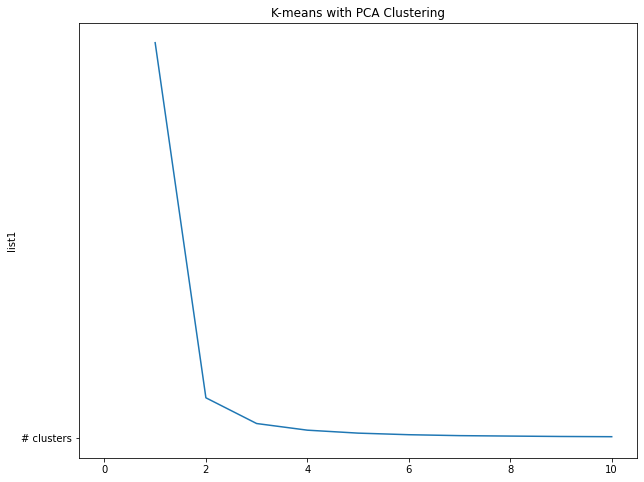

In [31]:
pca_trans_data = pca.transform(X)

list1 = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(pca_trans_data)
    list1.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), list1)
plt.plot('# clusters')
plt.ylabel('list1')
plt.title('K-means with PCA Clustering')
plt.show()

In [32]:
kmeans_pca = KMeans(3, init = 'k-means++')
kmeans_pca.fit(pca_trans_data)

KMeans(n_clusters=3)

<h7><center>Plotting Clusters</center></h7>

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


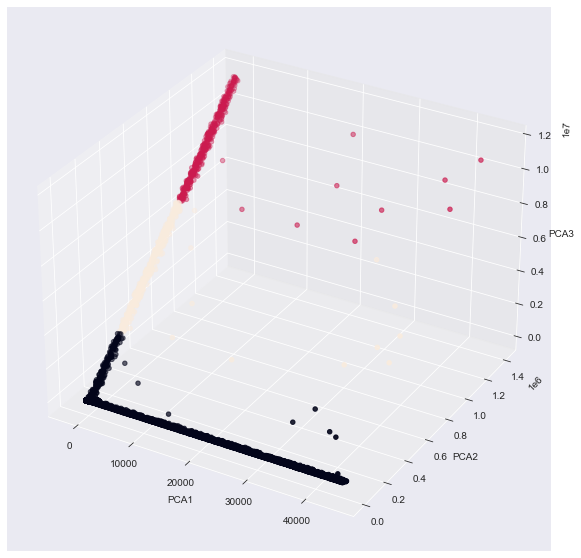

In [33]:
new_df = pd.concat([X.reset_index(drop = True), pd.DataFrame(pca_trans_data)], axis = 1)
new_df.columns.values[-3:] = ['PCA1', 'PCA2', 'PCA3']
new_df['K-Means_PCA_Group'] = kmeans_pca.labels_

sns.set_style("darkgrid")

x1 = new_df['PCA1']
y1 = new_df['PCA2']
z1 = new_df['PCA3']

plt.figure(figsize=(15, 10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x1, y1, z1, c = new_df['K-Means_PCA_Group'])

axes.set_xlabel('PCA1')
axes.set_ylabel('PCA2')
axes.set_zlabel('PCA3')

plt.show()

<h7><center>Adding Clusters to DataFrame</center></h7>

In [34]:
df['K-Means_PCA_Group'] = kmeans_pca.labels_
df['K-Means_PCA_Group'].value_counts()

0    99186
1      434
2      380
Name: K-Means_PCA_Group, dtype: int64

<h7><center>Clustering on KernelPCA for Visualization</center></h7>

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


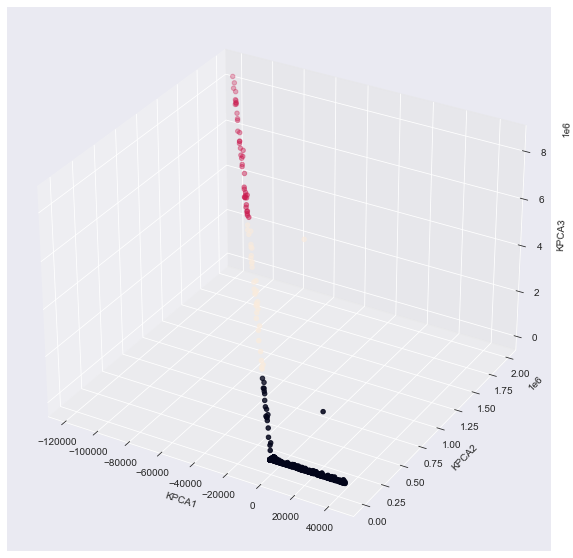

0    9925
1      42
2      34
Name: K-Means_KPCA_Group, dtype: int64

In [35]:
X = X.loc[:10000, features] #computationally intensive
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

pca = KernelPCA(4)
X_pca = pca.fit_transform(X_scaled)

component_names = [f"KPC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

pca_trans_data = pca.transform(X)

kmeans_kpca = KMeans(n_clusters = 3, init = 'k-means++')
kmeans_kpca.fit(pca_trans_data)

new_df = pd.concat([X.reset_index(drop = True), pd.DataFrame(pca_trans_data)], axis = 1)
new_df.columns.values[-3:] = ['KPCA1', 'KPCA2', 'KPCA3']
new_df['K-Means_KPCA_Group'] = kmeans_kpca.labels_

sns.set_style("darkgrid")

x1 = new_df['KPCA1']
y1 = new_df['KPCA2']
z1 = new_df['KPCA3']

plt.figure(figsize=(15, 10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x1, y1, z1, c = new_df['K-Means_KPCA_Group'])

axes.set_xlabel('KPCA1')
axes.set_ylabel('KPCA2')
axes.set_zlabel('KPCA3')

plt.show()

new_df['K-Means_KPCA_Group'].value_counts()

<h7><center>LDA</center></h7>

In [36]:
X = df.copy()
y = X.pop('Credit_Score')

lda = LDA(n_components=2) #n-1 categories 
X_lda = lda.fit_transform(X, y)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)

<h7><center>Clustering on LDA</center></h7>

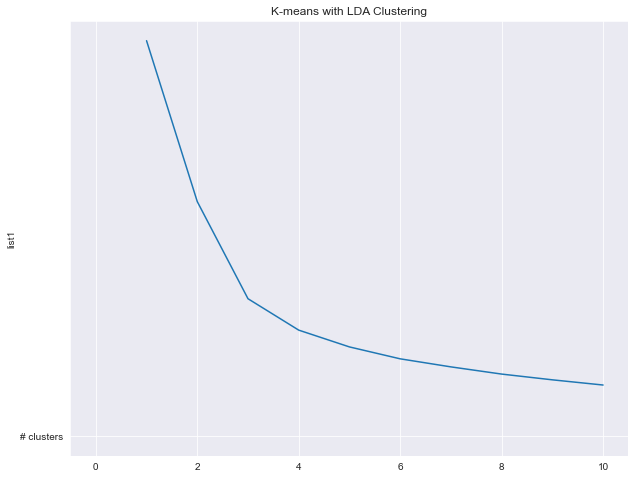

In [37]:
list1 = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(X_lda)
    list1.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), list1)
plt.plot('# clusters')
plt.ylabel('list1')
plt.title('K-means with LDA Clustering')
plt.show()

In [38]:
kmeans_kpca = KMeans(n_clusters = 4, init = 'k-means++')
kmeans_kpca.fit(X_lda)

KMeans(n_clusters=4)

<h7><center>Plotting Clusters</center></h7>

In [39]:
new_df = pd.concat([X.reset_index(drop = True), pd.DataFrame(X_lda)], axis = 1)
new_df.columns.values[-4:] = ['LDA1', 'LDA2', 'LDA3', 'LDA4']
new_df['K-Means_LDA_Group'] = kmeans_kpca.labels_

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


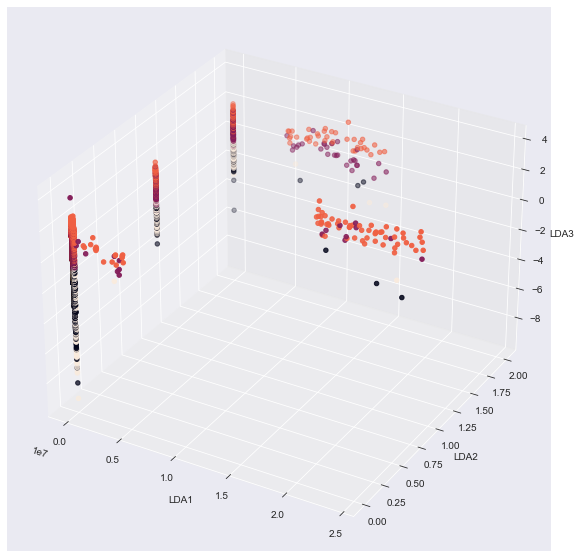

In [40]:
sns.set_style("darkgrid")

x1 = new_df['LDA1']
y1 = new_df['LDA2']
z1 = new_df['LDA3']

plt.figure(figsize=(15, 10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(x1, y1, z1, c = new_df['K-Means_LDA_Group'])

axes.set_xlabel('LDA1')
axes.set_ylabel('LDA2')
axes.set_zlabel('LDA3')

plt.show()

<h7><center>Adding Clusters to DataFrame</center></h7>

In [41]:
df['K-Means_LDA_Group'] = kmeans_kpca.labels_
df['K-Means_LDA_Group'].value_counts()

2    36832
1    30572
3    18131
0    14465
Name: K-Means_LDA_Group, dtype: int64

<h7><center>Target Encoding and Smoothing</center></h7>

Meant for binary categories, but logically I think with the number of observations, if we use a sum there should be a distinguishable difference between summations if I change target values to -1 (bad) / 0 (avg) / 1 (good)

In [42]:
X = df.copy()

<h7><center>Setting Targets</center></h7>

In [43]:
X['Credit_Score_Recoded'] = np.zeros((X.shape[0]))
for i, val in enumerate(X['Credit_Score']):
    if val == 0:
        X.iloc[i, -1] = 1 
    elif val == 1:
        X.iloc[i, -1] = -1
    else:
        X.iloc[i, -1] = 0

<h7><center>Encoding Groups by Summation</center></h7>

In [44]:
X['Month_enc'] = X.groupby('Month')['Credit_Score_Recoded'].transform('sum')
X['Occupation_enc'] = X.groupby('Occupation')['Credit_Score_Recoded'].transform('sum')
X['Credit_Mix_enc'] = X.groupby('Occupation')['Credit_Score_Recoded'].transform('sum')
X['Payment_Behaviour_enc'] = X.groupby('Payment_Behaviour')['Credit_Score_Recoded'].transform('sum')
X['K-Means_LDA_Group_enc'] = X.groupby('K-Means_LDA_Group')['Credit_Score_Recoded'].transform('sum')

<h7><center>Groups Prone to Overfitting</center></h7>

In [45]:
smo_dict1 = X['Type_of_Loan'].value_counts().to_dict()
X['Type_of_Loan'].value_counts()

-1       11408
 3463     1408
 684      1280
 4878     1272
 1410     1264
         ...  
 3735        8
 1686        8
 5780        8
 1622        8
 2047        8
Name: Type_of_Loan, Length: 6261, dtype: int64

In [46]:
X['K-Means_PCA_Group'].value_counts() # smoothing would be a waste of time

0    99186
1      434
2      380
Name: K-Means_PCA_Group, dtype: int64

In [47]:
smo_dict2 = X['Region'].value_counts().to_dict()
X['Region'].value_counts()

-1      5572
 958     208
 331     196
 792     193
 276     189
        ... 
 793      37
 520      36
 312      32
 116      30
 141      30
Name: Region, Length: 1001, dtype: int64

<h7><center>Smoothing</center></h7>

The idea is to blend the in-category average with the overall average. Rare categories get less weight on their category average, while missing categories just get the overall average.

In [48]:
X['Type_of_Loan_enc'] = X.groupby('Type_of_Loan')['Credit_Score_Recoded'].transform('sum')
X['Type_of_Loan_Smoothed'] = np.zeros((X.shape[0]))

val_list = []
for i, val in enumerate(X['Type_of_Loan_enc']):
    if X.iloc[i, 10] != -1:
        val_list.append(X.iloc[i, -2])
type_of_loan_avg = np.mean(val_list)

for j, val in enumerate(X['Type_of_Loan']):
    if X.iloc[j, 10] != -1:
        X.iloc[j, -1] = ((smo_dict1[val] / (smo_dict1[val] + (1 - smo_dict1[val]/X.shape[0]))) * X.iloc[j, -2]) + ((1 - (smo_dict1[val] / (smo_dict1[val] + (1 - smo_dict1[val]/X.shape[0])))) + type_of_loan_avg)
    else:
        X.iloc[j, -1] = type_of_loan_avg

In [49]:
X['Region_enc'] = X.groupby('Region')['Credit_Score_Recoded'].transform('sum')
X['Region_Smoothed'] = np.zeros((X.shape[0]))

val_list = []
for i, val in enumerate(X['Region_enc']):
    if X.iloc[i, 25] != -1:
        val_list.append(X.iloc[i, -2])
region_avg = np.mean(val_list)
region_avg

for j, val in enumerate(X['Region']):
    if X.iloc[j, 25] != -1:
        X.iloc[j, -1] = ((smo_dict2[val] / (smo_dict2[val] + (1 - smo_dict2[val]/X.shape[0]))) * X.iloc[j, -2]) + ((1 - (smo_dict2[val] / (smo_dict2[val] + (1 - smo_dict2[val]/X.shape[0])))) + region_avg)
    else:
        X.iloc[j, -1] = region_avg

<h7><center>Adding to DataFrame</center></h7>

In [50]:
df['Month_enc'] = X['Month_enc'] 
df['Occupation_enc'] = X['Occupation_enc']
df['Credit_Mix_enc'] = X['Credit_Mix_enc']
df['Payment_Behaviour_enc'] = X['Payment_Behaviour_enc']
df['K-Means_LDA_Group_enc'] = X['K-Means_LDA_Group_enc']
df['Type_of_Loan_Smoothed'] = X['Type_of_Loan_Smoothed']
df['Region_Smoothed'] = X['Region_Smoothed']

In [51]:
df.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Region,DTC_Ratio,I/O_Ratio,DTI_Ratio,Fin_cplx,PCA1_extraction1,PCA1_extraction2,PCA1_extraction3,K-Means_PCA_Group,K-Means_LDA_Group,Month_enc,Occupation_enc,Credit_Mix_enc,Payment_Behaviour_enc,K-Means_LDA_Group_enc,Type_of_Loan_Smoothed,Region_Smoothed
0,12320,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.000000,11.27,4.0,3,809.98,26.822620,22.083333,1,49.574949,80.415295,3,312.494089,0,821,0.002488,0.027167,0.042376,15.0,21331.872717,2.041150e+05,0.104509,0,1,-1607.0,-794.0,-794.0,-974.0,-1155.0,31.463957,-50.373756
1,12320,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,-1,6.000000,11.27,4.0,1,809.98,31.944960,22.166667,1,49.574949,118.280222,4,284.629162,0,821,0.002488,0.027167,0.042376,15.0,21341.872717,-5.831856e+04,-0.365960,0,2,-1523.0,-794.0,-794.0,-1051.0,8697.0,31.463957,-50.373756
2,12320,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,7.000000,10.27,4.0,1,809.98,28.609352,22.250000,1,49.574949,81.699521,5,331.209863,0,821,0.002488,0.027167,0.042376,15.0,21351.872717,2.041150e+05,0.104607,0,2,-1567.0,-794.0,-794.0,-1729.0,8697.0,31.463957,-50.373756
3,12320,0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,5,4.000000,6.27,4.0,1,809.98,31.377862,22.333333,1,49.574949,199.458074,6,223.451310,0,821,0.002488,0.027167,0.042376,15.0,21361.872717,1.943952e+05,0.109888,0,2,-1313.0,-794.0,-794.0,-5852.0,8697.0,31.463957,-50.373756
4,12320,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,6,6.000000,11.27,4.0,1,809.98,24.797347,22.416667,1,49.574949,41.420153,2,341.489231,0,821,0.002488,0.027167,0.042376,15.0,21321.872717,3.499114e+05,0.060935,0,2,-1402.0,-794.0,-794.0,-915.0,8697.0,31.463957,-50.373756
5,12320,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,8,4.000000,9.27,4.0,1,809.98,27.262259,22.500000,1,49.574949,62.430172,0,340.479212,0,821,0.002488,0.027167,0.042376,15.0,21341.872717,3.110323e+05,0.068616,0,2,-1366.0,-794.0,-794.0,-842.0,8697.0,31.463957,-50.373756
6,12320,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,8.000000,11.27,4.0,1,809.98,22.537593,22.583333,1,49.574949,178.344067,6,244.565317,0,821,0.002488,0.027167,0.042376,15.0,21361.872717,2.332742e+05,0.091574,0,2,-1203.0,-794.0,-794.0,-5852.0,8697.0,31.463957,-50.373756
7,12320,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4,128,3,6.000000,11.27,4.0,1,809.98,23.933795,22.666667,1,49.574949,24.785217,2,358.124168,2,-1,0.002488,0.027167,0.042376,15.0,21321.872717,1.749557e+05,0.121869,0,2,-1189.0,-794.0,-794.0,-915.0,8697.0,31.463957,-11.690823
8,1066,3,28.0,15,34847.84,3037.986667,2.0,4.0,6.0,1,684,3,4.000000,5.42,2.0,1,605.03,24.464031,26.583333,1,18.816215,104.291825,6,470.690627,2,4,0.000531,0.006194,0.017362,9.0,38460.809119,4.356216e+04,0.882875,0,2,-1607.0,-788.0,-788.0,-5852.0,8697.0,269.942536,-23.481271
9,1066,2,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1,684,7,1.000000,7.42,2.0,1,605.03,38.550848,26.666667,1,18.816215,40.391238,1,484.591214,0,4,0.000531,0.006194,0.017362,9.0,38410.809119,2.541126e+04,1.511507,0,2,-1523.0,-752.0,-752.0,193.0,8697.0,269.942536,-23.481271


<h7><center>Finally, Mutual Information</center></h7>

In [52]:
df[['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Delay_from_due_date', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Region', 'K-Means_PCA_Group', 'K-Means_LDA_Group']] = df[['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Delay_from_due_date', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Region', 'K-Means_PCA_Group', 'K-Means_LDA_Group']].astype(int)
discrete_features = df.dtypes == int

In [53]:
#y = df['Credit_Score']
#df = df.drop(('Credit_Score'), axis = 1)
df.shape

(100000, 42)

In [54]:
mi_scores = make_mi_scores(df, y, discrete_features)
mi_plot, mi_frame = mi_scores, mi_scores.to_frame()
mi_frame

,MI Scores
Credit_Score,1.013812
Customer_ID,0.684485
Annual_Income,0.618810
DTI_Ratio,0.618250
Monthly_Inhand_Salary,0.615002
Outstanding_Debt,0.613282
Total_EMI_per_month,0.546220
DTC_Ratio,0.541388
I/O_Ratio,0.537186
Type_of_Loan,0.366287


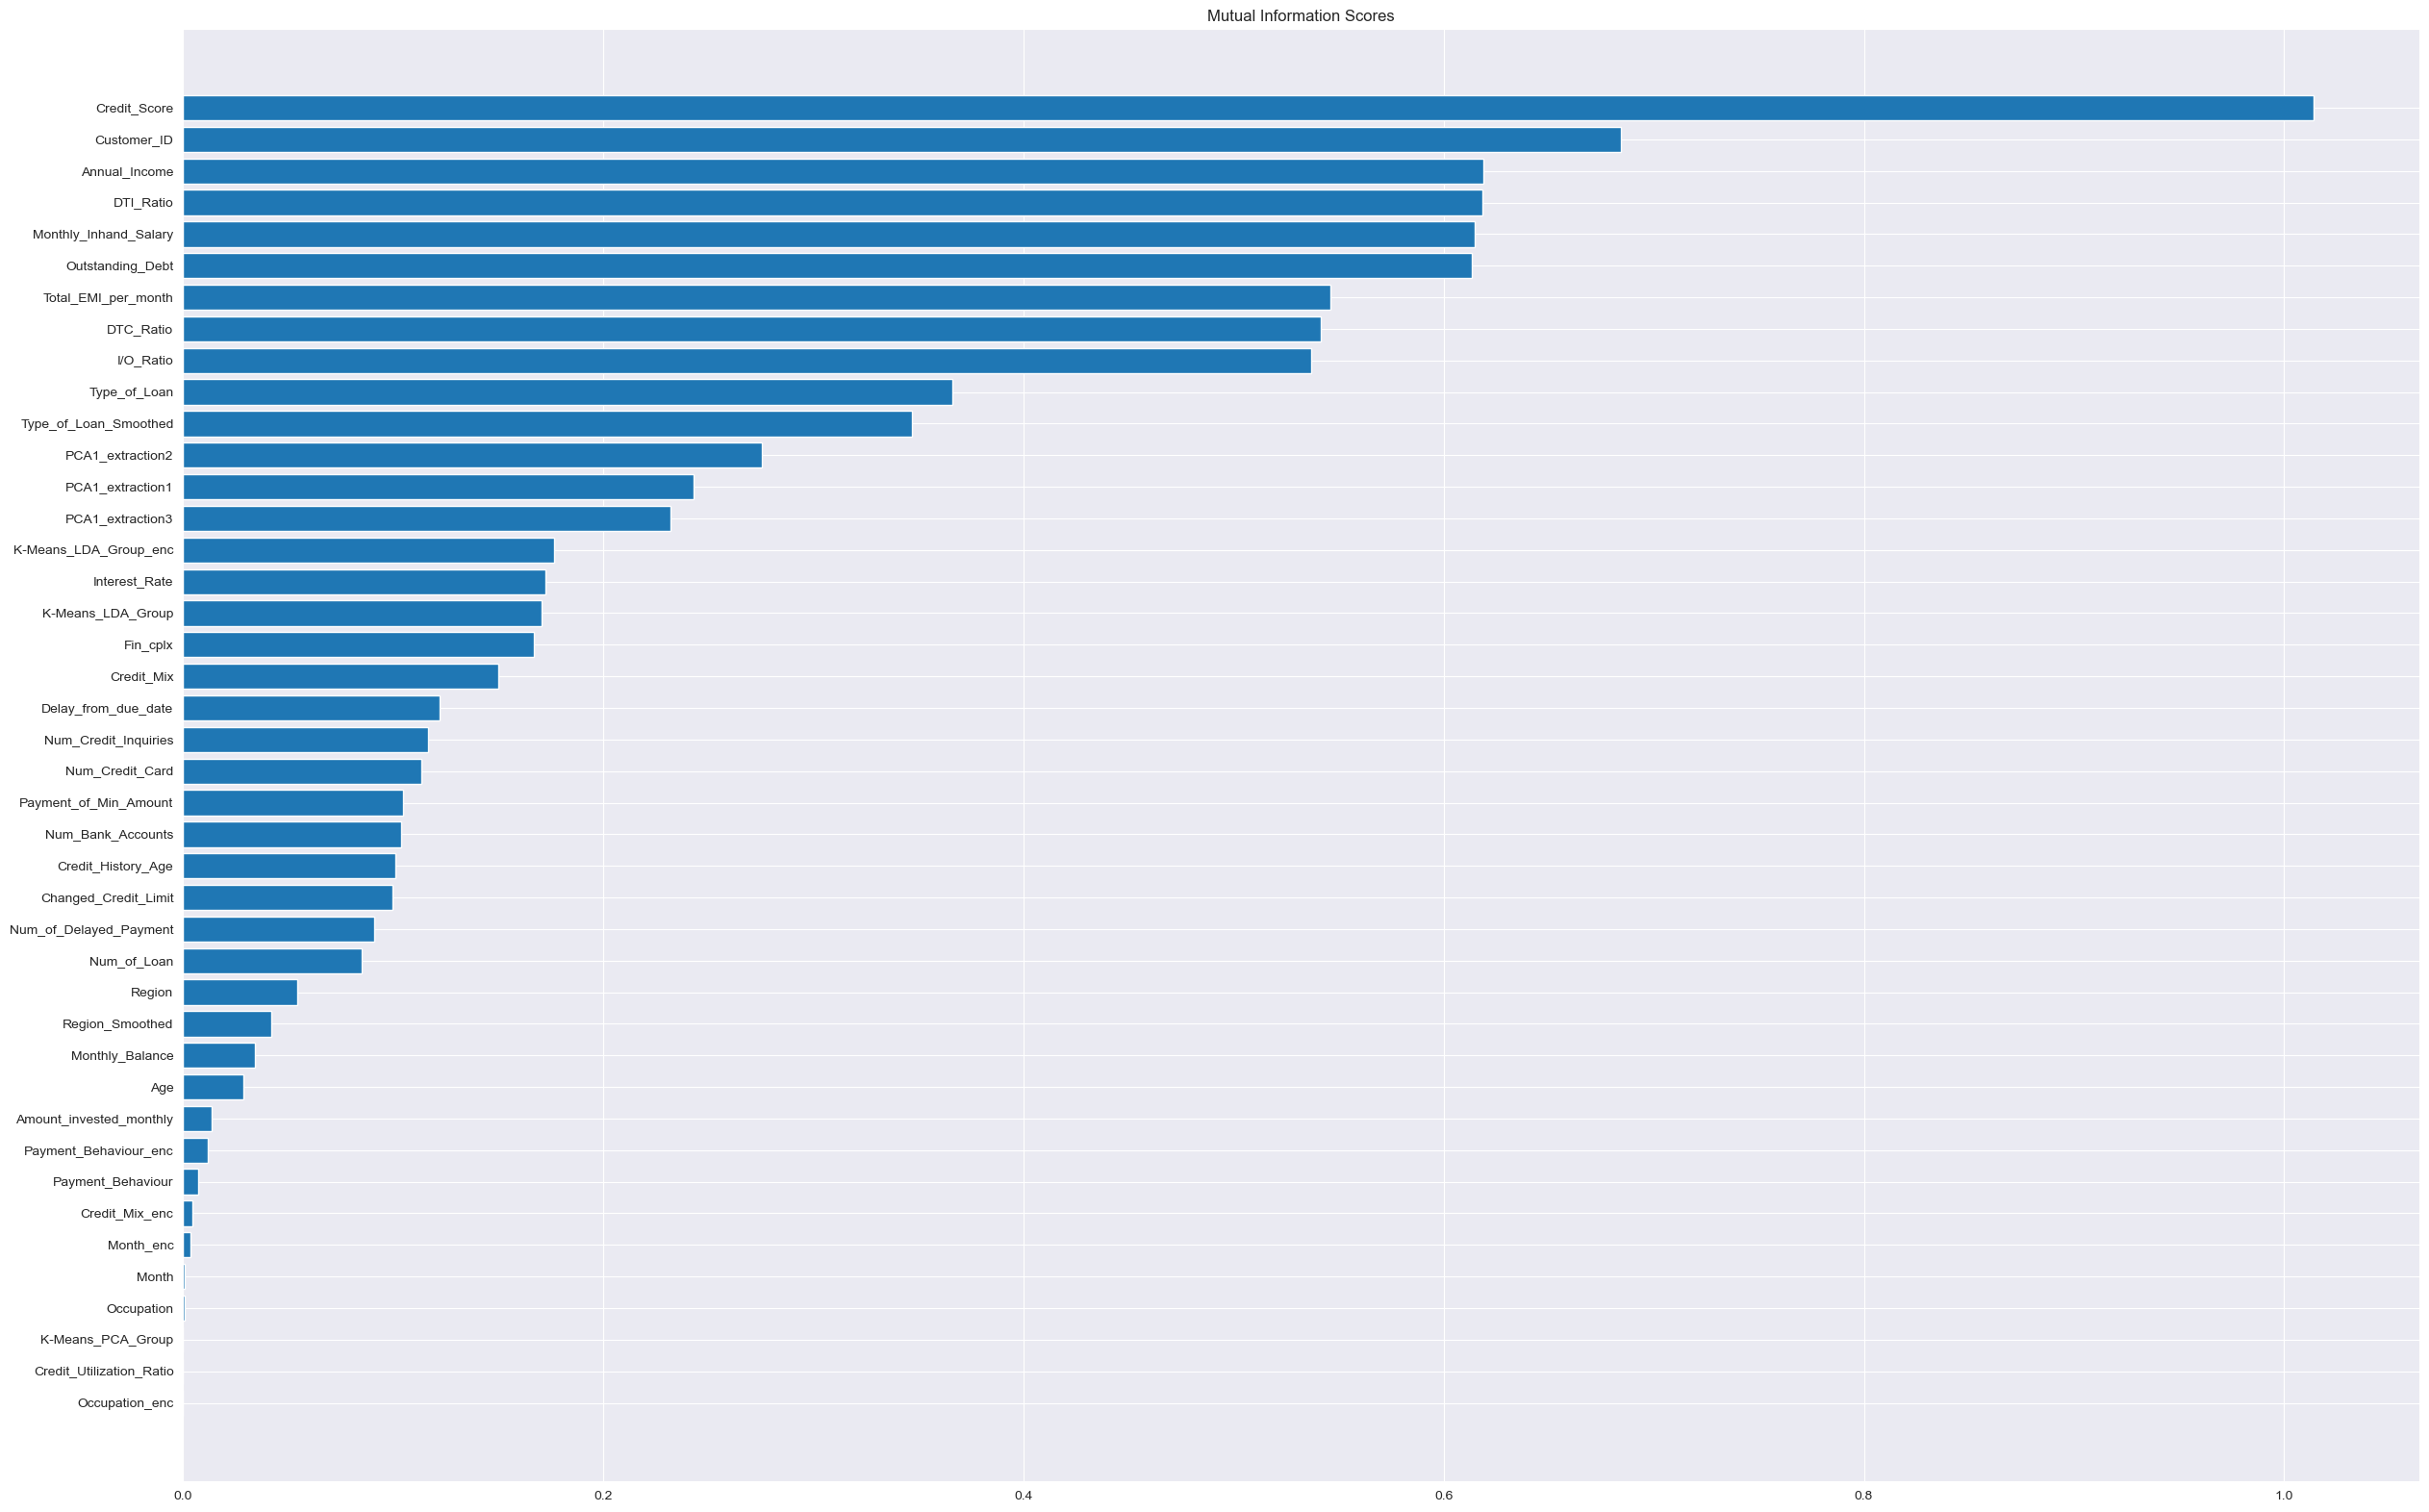

In [55]:
plt.figure(dpi=100, figsize=(30,20))
plot_mi_scores(mi_plot)

In [75]:
import pandas as pd
df = pd.read_csv("train.csv", low_memory = False)
cat_feat = ['Month', 'Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
for name in cat_feat:
    df[name]=df[name].astype('category')
    df[name]=df[name].cat.codes
df[['Month', 'Customer_ID']] = df[['Month', 'Customer_ID']].astype(int)
data = df[["Customer_ID", "Month", "Credit_Score"]]
data = data.sort_values(['Customer_ID', 'Month'])
data['Lagged_Score'] = data['Credit_Score'].shift(1)
data.head()

,Customer_ID,Month,Credit_Score,Lagged_Score
56755,0,0,1,NaN
56759,0,1,1,1.0
56753,0,2,1,1.0
56752,0,3,2,1.0
56758,0,4,1,2.0


In [81]:
count = np.zeros(len(data["Customer_ID"].unique()))
for i in range(1, len(data["Credit_Score"])):
    for j in range(len(data["Customer_ID"].unique())):
        if data["Customer_ID"][i] == data["Customer_ID"][i-1]:
            if data["Credit_Score"][i] == data["Lagged_Score"][i]:
                count[j] += 1